# Customer Churn Challenge

**Set up and import needed libraries**

In [1]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.2 MB/s 
     |████████████████████████████████| 2.0 MB 51.2 MB/s 
     |████████████████████████████████| 88 kB 6.5 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 1.3 MB 43.2 MB/s 
     |████████████████████████████████| 120 kB 73.3 MB/s 
     |████████████████████████████████| 17.8 MB 624 kB/s 
     |████████████████████████████████| 1.7 MB 48.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 30.5 MB/s 
     |████████████████████████████████| 167 kB 55.7 MB/s 
     |████████████████████████████████| 262 kB 58.9 MB/s 
     |████████████████████████████████| 449 kB 69.6 MB/s 
     |████████████████████████████████| 1

In [1]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [6]:
df = pd.read_csv('raw_data.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce').fillna(0)
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [10]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [19]:
cust_churn = setup(data=df, 
            target = 'Churn', 
            session_id=13, 
            log_experiment=False, 
            experiment_name='customer_churn',
            ignore_features=['customerID'],
            normalize=True,
            normalize_method = 'minmax',
            fix_imbalance=True,
            data_split_stratify=True)

,Description,Value
0,session_id,13
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7032, 21)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7489,0.8412,0.7874,0.5183,0.6249,0.4480,0.4704,0.565
ada,Ada Boost Classifier,0.7672,0.8421,0.7270,0.5465,0.6236,0.4599,0.4701,0.435
gbc,Gradient Boosting Classifier,0.7832,0.8427,0.6704,0.5802,0.6216,0.4709,0.4737,1.168
lda,Linear Discriminant Analysis,0.7391,0.8385,0.7821,0.5062,0.6144,0.4308,0.4542,0.128
ridge,Ridge Classifier,0.7385,0.0000,0.7790,0.5055,0.6130,0.4288,0.4519,0.095
nb,Naive Bayes,0.7343,0.8238,0.7790,0.5006,0.6093,0.4222,0.4461,0.098
lightgbm,Light Gradient Boosting Machine,0.7889,0.8312,0.6131,0.6008,0.6067,0.4625,0.4627,0.367
svm,SVM - Linear Kernel,0.7296,0.0000,0.7660,0.4970,0.6004,0.4108,0.4357,0.140
catboost,CatBoost Classifier,0.7885,0.8349,0.5924,0.6048,0.5981,0.4547,0.4551,10.526
rf,Random Forest Classifier,0.7832,0.8195,0.5939,0.5916,0.5924,0.4448,0.4451,1.097


In [21]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7546,0.8508,0.8397,0.5238,0.6452,0.4725,0.5033
1,0.7444,0.8584,0.8244,0.5118,0.6316,0.4519,0.4820
2,0.7602,0.8509,0.7846,0.5312,0.6335,0.4649,0.4845
3,0.7195,0.8056,0.7231,0.4796,0.5767,0.3796,0.3975
4,0.7276,0.8233,0.7710,0.4927,0.6012,0.4093,0.4329
5,0.7602,0.8528,0.8015,0.5330,0.6402,0.4711,0.4931
6,0.7480,0.8520,0.7863,0.5176,0.6242,0.4465,0.4686
7,0.7480,0.8284,0.7710,0.5179,0.6196,0.4418,0.4614
8,0.7724,0.8553,0.8321,0.5477,0.6606,0.5001,0.5248


In [24]:
lr_tuned = tune_model(lr,choose_better=True,n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7546,0.8506,0.8397,0.5238,0.6452,0.4725,0.5033
1,0.7444,0.8584,0.8244,0.5118,0.6316,0.4519,0.4820
2,0.7602,0.8507,0.7846,0.5312,0.6335,0.4649,0.4845
3,0.7195,0.8054,0.7231,0.4796,0.5767,0.3796,0.3975
4,0.7276,0.8232,0.7710,0.4927,0.6012,0.4093,0.4329
5,0.7602,0.8528,0.8015,0.5330,0.6402,0.4711,0.4931
6,0.7480,0.8521,0.7863,0.5176,0.6242,0.4465,0.4686
7,0.7480,0.8284,0.7710,0.5179,0.6196,0.4418,0.4614
8,0.7724,0.8553,0.8321,0.5477,0.6606,0.5001,0.5248


In [25]:
print(lr_tuned)

LogisticRegression(C=0.953, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


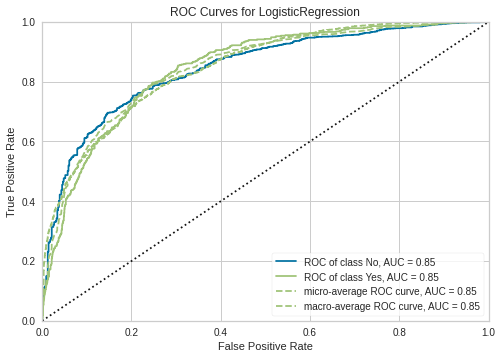

In [26]:
plot_model(lr_tuned, plot="auc")

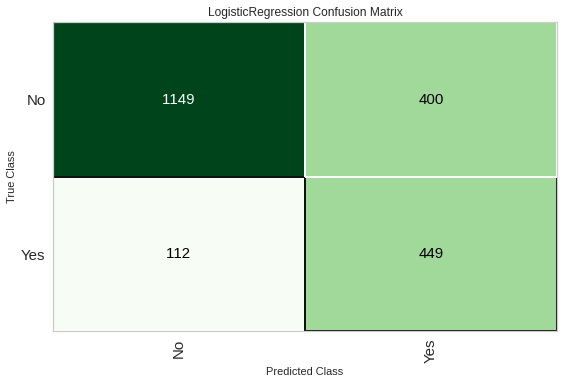

In [35]:
plot_model(lr_tuned, plot='confusion_matrix')

Scenario analysis:
- Assuming as results of following the model, the business will reach out to those predicted as "Risk of Churning" and give them an offer
- The offer is 10% discount off of their contract.
- Assuming each contract is 1000USD life time revenue
- we have 449 True positive (those were about to churn but our model highlighted them correctly) our extra revenue be 449 * 1000 USD = 449,000 USD
- As cost we had to offer 10% off to all at risk customers = 449 + 419 = 868 x 100 = 86,800 USD
- As net, we generated extra 449,000 USD - 86,800 = 362,200 USD

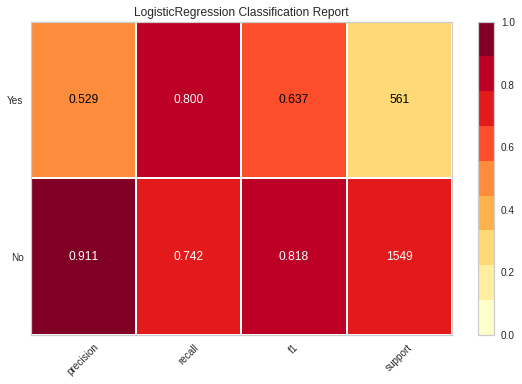

In [30]:
plot_model(lr_tuned, plot="class_report")

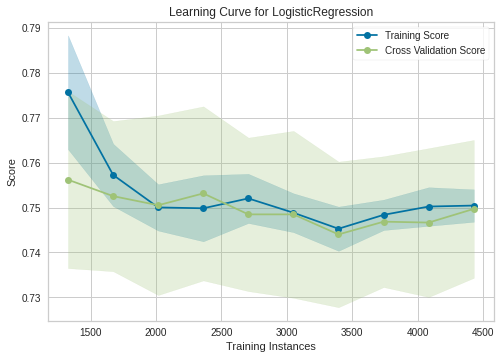

In [31]:
plot_model(lr_tuned, plot="learning")

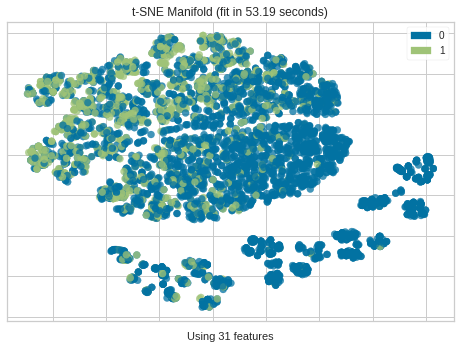

In [32]:
plot_model(lr_tuned, plot="manifold")

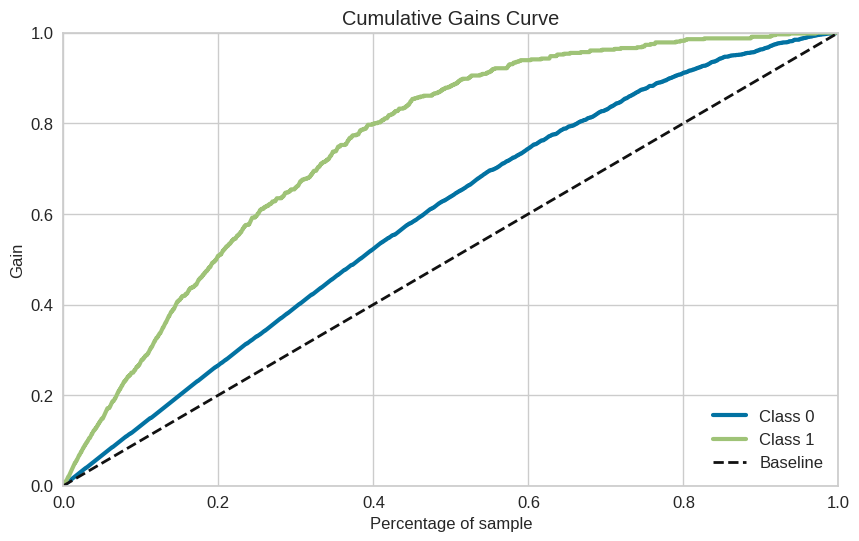

In [34]:
plot_model(lr_tuned, plot='gain')